In [30]:
# University of Arizona Boot Camp
# Bryan Paynich
# Climate Homework
# 02/15/2019

# Setup all important libraries
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

import warnings
warnings.filterwarnings("ignore")

In [31]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [32]:
# Setup engine to read weather database
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [33]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [34]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [35]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [36]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [37]:
# Inspect database for table names
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [38]:
# Get column names from measurement table
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [39]:
# Get column names from station table
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

In [40]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date
# column
# Sort the dataframe by date
# Use Pandas Plotting with Matplotlib to plot the data

In [41]:
highdate = session.query(Measurement.date).order_by(Measurement.date.desc()).first() 
print(highdate)

('2017-08-23',)


In [42]:
year_ago  = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(year_ago)

2016-08-23


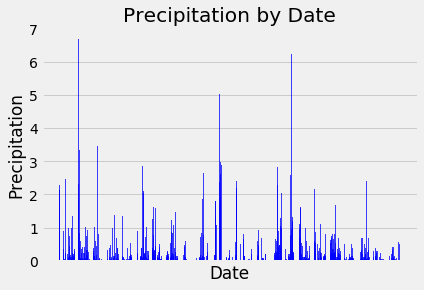

In [43]:
Meas12 = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2016-08-23').\
    order_by(Measurement.date).all()
measure = pd.DataFrame(Meas12)
#measure.head()

# Sorted Values
measure_sorted = measure.sort_values(by='date')

# Convert dataframe columns to lists
date_list = measure['date'].tolist()
prcp_list = measure['prcp'].tolist()

# Create preciptitation bar Chart
plt.title("Precipitation by Date")
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.xticks([])
plt.bar(date_list, prcp_list, facecolor="blue", alpha=0.75, align="center")
plt.show()

In [44]:
# Use Pandas to calculate the summary statistics for the precipitation data
measure_sorted.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [45]:
# Design a query to show how many stations are available in this dataset?
num_stations = session.query(Station.id).count()
print("There are {} stations in the database".format(num_stations))

There are 9 stations in the database


In [46]:
session.query(Measurement.station, Measurement.id).\
    group_by(Measurement.station).order_by(Measurement.id.desc()).all()

[('USC00516128', 19550),
 ('USC00511918', 16938),
 ('USC00519281', 14959),
 ('USC00519523', 12187),
 ('USC00518838', 9518),
 ('USC00517948', 9007),
 ('USC00514830', 7635),
 ('USC00513117', 5433),
 ('USC00519397', 2724)]

In [47]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

In [48]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.max(Measurement.tobs),func.min(Measurement.tobs),func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00516128').all()

[(84.0, 58.0, 70.91500765696784)]

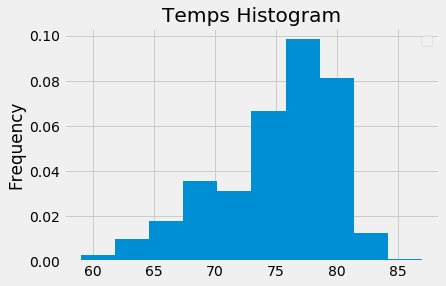

In [49]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temps = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station > 'USC00516128').\
    filter(Measurement.date > '2016-08-23').\
    order_by(Measurement.date).all()
temps_df = pd.DataFrame(temps)
#measure.head()

# Sorted Values
temps_df_sorted = temps_df.sort_values(by='date')

# Convert dataframe columns to lists
date_list = temps_df_sorted['date'].tolist()
tobs_list = temps_df_sorted['tobs'].tolist()

# Create preciptitation bar Chart
plt.title("Temps Histogram")
plt.ylabel("Frequency")
plt.legend('tobs')
plt.hist(tobs_list, normed=True)
plt.show()

In [68]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [69]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps('2017-08-23', '2018-08-23'))

[(76.0, 80.25, 82.0)]


[(76.0, 80.25, 82.0)]


TypeError: only size-1 arrays can be converted to Python scalars

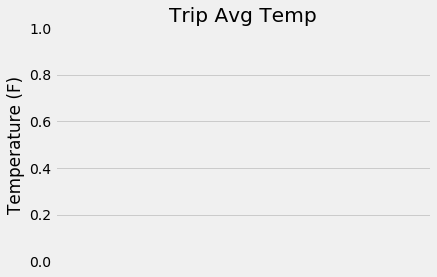

In [80]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
vacation_temp = (calc_temps('2017-08-23', '2018-08-30'))
print(vacation_temp)
index = (1,2,3)

# Create preciptitation bar Chart
plt.title("Trip Avg Temp")
plt.ylabel("Temperature (F)")
plt.xticks([])
plt.bar(index, vacation_temp, facecolor="blue", alpha=0.75, align="center")
plt.show()

In [62]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


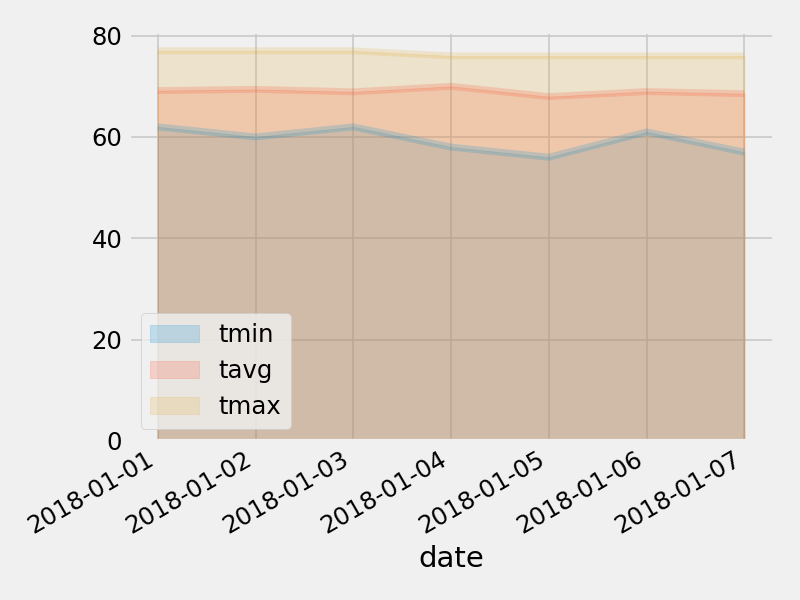

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
